# Notebook for user technical test. Satria Audria Sakti

In [1]:
# First, I'll load library/module needed for the assesment

# I'll use pandas and numpy for data manipulation and loader (as dataframe)
import numpy as np
import pandas as pd
# I'll use pyplot and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns


Now I'll load the csv data

In [2]:
df = pd.read_csv('test-case.csv')
df

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price
0,AMRUL QOIS,HYUNDAI MAMPANG,"HYUNDAI, CRETA PRIME 1.5 SINGLE TONE IVT, 2022",10/27/2024,Operational,"8,085,000","404,000,000"
1,AZIZATUL MUNIFAH,HONDA MANDALASENA,"HONDA, ALL NEW BR-V E CVT, 2023",11/10/2024,Operational,"4,858,000","330,450,000"
2,BHARATH SRINIVASAN SETHURAMAN,HONDA MANDIRI BOGOR,"HONDA, ALL NEW CRV 1.5 TURBO PRESTIGE, 2022",11/15/2024,Operational,"9,266,000","653,400,000"
3,MARSUDIN,HONDA CIKARANG,"HONDA, ALL NEW CITY HATCHBACK RS CVT, 2021",10/27/2024,Operational,"5,881,000","302,000,000"
4,NI NYOMAN PUJI ASTUTI,HONDA BINTANG TABANAN,"HONDA, ALL NEW BRIO E CVT, 2024",11/25/2024,Operational,"6,946,000","228,200,000"
...,...,...,...,...,...,...,...
30928,"ZURAIDA,S.PD",HONDA AUTOBEST,"HONDA, HONDA JAZZ E RS MT 2012(ASURANSI CAPITA...",NaN,Incomplete,"5,325,000","215,000,000"
30929,ZURDALENIS,HONDA WILTOP JAMBI,"HONDA, ALL NEW BRV PRESTIGE, 2022",9/27/2024,Operational,"6,864,000","360,500,000"
30930,ZURDEWAN,HONDA ARISTA PEKANBARU,"HONDA, ALL NEW BRIO E MT, 2020",8/27/2024,Operational,"3,227,000","186,500,000"
30931,ZURISMIATI,HONDA DAAN MOGOT,"HONDA, ALL NEW BRIO E CVT, 2022",11/15/2024,Operational,"3,703,000","189,700,000"


Then I'll start to address its missingness 

In [3]:
total_missingness = df.isna().sum()
# I'd prefer to call it directly rather than using print
total_missingness   

# Use this to only select column that has null
# total_missingness[total_missingness > 1]

customer_name          0
dealer_name            0
unit_description       0
due_date            1736
status                 0
 installment           0
 cost_price            0
dtype: int64

I'll check out every row that has its data missing before I proceed

In [4]:
null_rows = df[df['due_date'].isnull()].copy() # Use copy to ignore the warning, as well as to make memory effienct
null_rows

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price
17,A LATU TRIPURANTOKO,HONDA MAJU MOTOR,"HONDA, BRIO SATYA E CVT, 2017",NaN,Incomplete,"3,445,000","151,500,000"
67,A.ROCHAYAH,MERCINDO MAMPANG,"MERCEDEZ BENZ, MERCEDES S 350 L 2011, 2011",NaN,Write-off,"56,749,000","2,192,000,000"
70,A.WIRAWAN SIMATUPANG,HONDA PONDOK INDAH,"HONDA, HONDA CRV 2.4 AT 2009, 2009",NaN,Incomplete,"9,331,000","379,000,000"
102,ABD MUNIB,HONDA MANDALASENA,"HONDA, ALL NEW BRIO E MT, 2020",NaN,Incomplete,"2,971,000","169,450,000"
142,ABDUL BASID BAKI SP.OG,MERCEDES-BENZ SIMATUPANG,"MERCEDEZ BENZ, MERCEDES BENZ C 280 AVG 2009, 2009",NaN,Incomplete,"22,663,000","700,000,000"
...,...,...,...,...,...,...,...
30905,ZULKARNAEN,HONDA PRIMA KRANJI,"HONDA, HONDA CRV 2.0 AT 2010, 2010",NaN,Incomplete,"7,989,000","357,000,000"
30906,ZULKARNAEN SIREGAR,HONDA PONDOK PINANG,"HONDA, HONDA JAZZ S AT 2012, 2012",NaN,Incomplete,"4,798,000","201,000,000"
30919,ZULKIPLI LAKSANA,HONDA PLUIT,"HONDA, HONDA JAZZ E AT 2011, 2011",NaN,Incomplete,"5,317,000","216,000,000"
30922,ZULPADLI,HONDA WILTOP JAMBI,"HONDA, HRV 1.5 E CVT, 2019",NaN,Incomplete,"6,604,000","300,500,000"


As we can see on the table above, it seems that every null `due_date` are correlated with the status, let's check it further.

In [5]:
unq_status = null_rows['status'].unique()
print(unq_status)
unq_status_counts = null_rows['status'].value_counts(dropna=False).reset_index()
unq_status_counts

['Incomplete' 'Write-off' 'Expired with Due Amount']


,status,count
0,Incomplete,1719
1,Expired with Due Amount,10
2,Write-off,7


It returns 3 unique values with more than 98% of them came from Incomplete status, let's compare it with data that are clean (no null)

In [6]:
no_null = df[df['due_date'].notnull()].copy()
no_null

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price
0,AMRUL QOIS,HYUNDAI MAMPANG,"HYUNDAI, CRETA PRIME 1.5 SINGLE TONE IVT, 2022",10/27/2024,Operational,"8,085,000","404,000,000"
1,AZIZATUL MUNIFAH,HONDA MANDALASENA,"HONDA, ALL NEW BR-V E CVT, 2023",11/10/2024,Operational,"4,858,000","330,450,000"
2,BHARATH SRINIVASAN SETHURAMAN,HONDA MANDIRI BOGOR,"HONDA, ALL NEW CRV 1.5 TURBO PRESTIGE, 2022",11/15/2024,Operational,"9,266,000","653,400,000"
3,MARSUDIN,HONDA CIKARANG,"HONDA, ALL NEW CITY HATCHBACK RS CVT, 2021",10/27/2024,Operational,"5,881,000","302,000,000"
4,NI NYOMAN PUJI ASTUTI,HONDA BINTANG TABANAN,"HONDA, ALL NEW BRIO E CVT, 2024",11/25/2024,Operational,"6,946,000","228,200,000"
...,...,...,...,...,...,...,...
30927,ZUMROTUN,WULING ARISTA PLUIT,"WULING, ALVEZ TYPE EX, 2023",9/27/2024,Operational,"5,503,000","295,000,000"
30929,ZURDALENIS,HONDA WILTOP JAMBI,"HONDA, ALL NEW BRV PRESTIGE, 2022",9/27/2024,Operational,"6,864,000","360,500,000"
30930,ZURDEWAN,HONDA ARISTA PEKANBARU,"HONDA, ALL NEW BRIO E MT, 2020",8/27/2024,Operational,"3,227,000","186,500,000"
30931,ZURISMIATI,HONDA DAAN MOGOT,"HONDA, ALL NEW BRIO E CVT, 2022",11/15/2024,Operational,"3,703,000","189,700,000"


In [7]:
unq_status_nn = no_null['status'].unique()
print(unq_status_nn)
unq_status_counts_nn = no_null['status'].value_counts(dropna=False).reset_index()
unq_status_counts_nn

['Operational' 'Write-off' 'Expired with Due Amount'
 'Termination in progress']


,status,count
0,Operational,27622
1,Write-off,1479
2,Expired with Due Amount,94
3,Termination in progress,2


The difference can be seen that the 'complete' data without any null from due_date didn't have any 'Incomplete' status. </br>
And now let's continue to check is there any duplications within the data

In [8]:
num_dupes = df.duplicated().sum()
num_dupes

527

More than 500 data are duplicated, let's check and then remove its duplicate data

In [9]:
dupes = df[df.duplicated(keep='first')] # Here i'm using the keep='first' to show only its duplication appearance, it can be seen that there are data that
                                        # have multiple of duplication!
dupes

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price
3855,AYU LESTARI,HONDA NAGOYA,"HONDA, BRIO SATYA 1.2 E CVT, 2023",10/27/2024,Operational,"4,750,000","244,500,000"
5040,CV. AMI GROUP,PT. GITA RIAU MAKMUR,"HINO, DUTRO 136 HDX PTO + DUMP, 2022",8/27/2024,Operational,"13,183,000","560,000,000"
5049,CV. ASKA BALI,HONDA BINTANG TABANAN,"HONDA, ALL NEW BRIO E CVT, 2022",10/27/2024,Operational,"4,418,000","208,280,000"
5051,CV. AYU MAS SARI,HONDA BINTANG TABANAN,"HONDA, ALL NEW BRIO E CVT, 2022",10/27/2024,Operational,"4,304,000","206,780,000"
5052,CV. AYU MAS SARI,HONDA BINTANG TABANAN,"HONDA, ALL NEW BRIO E CVT, 2022",10/27/2024,Operational,"4,304,000","206,780,000"
...,...,...,...,...,...,...,...
27940,THE MULIANA,AUTO2000 MUARA KARANG,"TOYOTA, TOYOTA AVANZA G'08, 2008",NaN,Incomplete,"9,488,000","131,850,000"
29878,YAYASAN DANASHA,HONDA IMORA SENTUL,"HONDA, ALL NEW BRIO RS CVT, 2020",11/15/2024,Operational,"5,483,000","200,200,000"
29879,YAYASAN DANASHA,HONDA IMORA SENTUL,"HONDA, ALL NEW BRIO RS CVT, 2020",11/15/2024,Operational,"5,483,000","200,200,000"
29880,YAYASAN DANASHA,HONDA IMORA SENTUL,"HONDA, ALL NEW BRIO RS CVT, 2020",11/15/2024,Operational,"5,483,000","200,200,000"


The dupes showed above are based of full columns check, means that it shows as duplicate only if all of the column values are equal (==) </br>
Now let's just drop the duplicates and don't forget to reset its index.

In [10]:
prev_size = len(df)
df = df.drop_duplicates().reset_index(drop=True)
curr_size = len(df)
removed_total = prev_size - curr_size
print(f"{removed_total} number of duplicates has been successfully removed.")
# Try to check its dupes again
num_dupes = df.duplicated().sum()
print(num_dupes)
df

527 number of duplicates has been successfully removed.
0


,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price
0,AMRUL QOIS,HYUNDAI MAMPANG,"HYUNDAI, CRETA PRIME 1.5 SINGLE TONE IVT, 2022",10/27/2024,Operational,"8,085,000","404,000,000"
1,AZIZATUL MUNIFAH,HONDA MANDALASENA,"HONDA, ALL NEW BR-V E CVT, 2023",11/10/2024,Operational,"4,858,000","330,450,000"
2,BHARATH SRINIVASAN SETHURAMAN,HONDA MANDIRI BOGOR,"HONDA, ALL NEW CRV 1.5 TURBO PRESTIGE, 2022",11/15/2024,Operational,"9,266,000","653,400,000"
3,MARSUDIN,HONDA CIKARANG,"HONDA, ALL NEW CITY HATCHBACK RS CVT, 2021",10/27/2024,Operational,"5,881,000","302,000,000"
4,NI NYOMAN PUJI ASTUTI,HONDA BINTANG TABANAN,"HONDA, ALL NEW BRIO E CVT, 2024",11/25/2024,Operational,"6,946,000","228,200,000"
...,...,...,...,...,...,...,...
30401,"ZURAIDA,S.PD",HONDA AUTOBEST,"HONDA, HONDA JAZZ E RS MT 2012(ASURANSI CAPITA...",NaN,Incomplete,"5,325,000","215,000,000"
30402,ZURDALENIS,HONDA WILTOP JAMBI,"HONDA, ALL NEW BRV PRESTIGE, 2022",9/27/2024,Operational,"6,864,000","360,500,000"
30403,ZURDEWAN,HONDA ARISTA PEKANBARU,"HONDA, ALL NEW BRIO E MT, 2020",8/27/2024,Operational,"3,227,000","186,500,000"
30404,ZURISMIATI,HONDA DAAN MOGOT,"HONDA, ALL NEW BRIO E CVT, 2022",11/15/2024,Operational,"3,703,000","189,700,000"


Now it's done, there's no need to impute its null value because every row has its meaning </br> 
(can be seen based on the distinct value of its status, compared to the clean one). </br>
Now let's move to check its dataformat, and try to fix if something unusual has been found.

In [11]:
df.dtypes

customer_name       object
dealer_name         object
unit_description    object
due_date            object
status              object
 installment        object
 cost_price         object
dtype: object

As we can see above, all the data are loaded as an object. it's a common problem that usually occured after the data has been pulled from the DBMS (as .csv), let's correct it into the right one.

In [12]:
# Before that, let's check and remove first/last whitespace either in value or column as part of formatting the errors.
print(df.columns.tolist())

['customer_name', 'dealer_name', 'unit_description', 'due_date', 'status', ' installment ', ' cost_price ']


In [13]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['customer_name', 'dealer_name', 'unit_description', 'due_date', 'status', 'installment', 'cost_price']


Now the column name seems ok, let's check the value as well

In [14]:
df['installment'] = df['installment'].astype(int)
df.dtypes

ValueError: invalid literal for int() with base 10: ' 8,085,000 '

As we can see above, numeric data shouldn't have any char except numbers in its value. Let's remove every comma in `installment` and `cost_price`

In [15]:
# Repair the installment and cost_price cols
df['installment'] = df['installment'].str.replace(',', '', regex=False).astype(float)
df['cost_price'] = df['cost_price'].str.replace(',', '', regex=False).astype(float)
df.dtypes

customer_name        object
dealer_name          object
unit_description     object
due_date             object
status               object
installment         float64
cost_price          float64
dtype: object

I casted the dtype into float instead of int to make it safer and more effective since it holds 'payment/price' data.

In [16]:
# Check it again
df

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price
0,AMRUL QOIS,HYUNDAI MAMPANG,"HYUNDAI, CRETA PRIME 1.5 SINGLE TONE IVT, 2022",10/27/2024,Operational,8085000.0,404000000.0
1,AZIZATUL MUNIFAH,HONDA MANDALASENA,"HONDA, ALL NEW BR-V E CVT, 2023",11/10/2024,Operational,4858000.0,330450000.0
2,BHARATH SRINIVASAN SETHURAMAN,HONDA MANDIRI BOGOR,"HONDA, ALL NEW CRV 1.5 TURBO PRESTIGE, 2022",11/15/2024,Operational,9266000.0,653400000.0
3,MARSUDIN,HONDA CIKARANG,"HONDA, ALL NEW CITY HATCHBACK RS CVT, 2021",10/27/2024,Operational,5881000.0,302000000.0
4,NI NYOMAN PUJI ASTUTI,HONDA BINTANG TABANAN,"HONDA, ALL NEW BRIO E CVT, 2024",11/25/2024,Operational,6946000.0,228200000.0
...,...,...,...,...,...,...,...
30401,"ZURAIDA,S.PD",HONDA AUTOBEST,"HONDA, HONDA JAZZ E RS MT 2012(ASURANSI CAPITA...",NaN,Incomplete,5325000.0,215000000.0
30402,ZURDALENIS,HONDA WILTOP JAMBI,"HONDA, ALL NEW BRV PRESTIGE, 2022",9/27/2024,Operational,6864000.0,360500000.0
30403,ZURDEWAN,HONDA ARISTA PEKANBARU,"HONDA, ALL NEW BRIO E MT, 2020",8/27/2024,Operational,3227000.0,186500000.0
30404,ZURISMIATI,HONDA DAAN MOGOT,"HONDA, ALL NEW BRIO E CVT, 2022",11/15/2024,Operational,3703000.0,189700000.0


Now let's continue to fix all the rest of col dtypes.

In [17]:
df['status'] = df['status'].astype('category')
df['due_date'] = pd.to_datetime(df['due_date'])

# str col map
str_cols = ['customer_name', 'dealer_name', 'unit_description']
for col in str_cols:
    df[col] = df[col].astype('string')

print(f"Below is the corrected dtypes for the data.")
df.dtypes

Below is the corrected dtypes for the data.


customer_name       string[python]
dealer_name         string[python]
unit_description    string[python]
due_date            datetime64[ns]
status                    category
installment                float64
cost_price                 float64
dtype: object

Now let's check any leading or trailing whitespaces within the string columns.

In [18]:
print(f"Checking the `customer_name` column")
print(df['customer_name'].unique())
print(f"Checking the `dealer_name` column")
print(df['dealer_name'].unique())
print(f"Checking the `unit_description` column")
print(df['unit_description'].unique())

Checking the `customer_name` column
<StringArray>
[                     ' AMRUL QOIS',                ' AZIZATUL MUNIFAH',
   ' BHARATH SRINIVASAN SETHURAMAN',                        ' MARSUDIN',
           ' NI NYOMAN PUJI ASTUTI',                  'A AISYAH DAHLAN',
                 'A AUDY RISMAN,SH',              'A BADRU JAMAN, S.Tr',
 'A CEMPAKA MBOJO DANOPA, A.Md.Keu',                    'A DONI WIBOWO',
 ...
                         'ZULPIKAR',                  'ZULTIFADLI SYAM',
                 'ZULVICKAR GUSMAN',                          'ZUMIRA ',
                         'ZUMROTUN',                     'ZURAIDA,S.PD',
                       'ZURDALENIS',                        'ZURDEWAN ',
                       'ZURISMIATI',            'ZWESTY DOLLY CORNELES']
Length: 27212, dtype: string
Checking the `dealer_name` column
<StringArray>
[                       'HYUNDAI MAMPANG',
                      'HONDA MANDALASENA',
                    'HONDA MANDIRI BOGOR',
         

In [19]:
# Remove any leading and trailing whitespace
df['customer_name'] = df['customer_name'].str.strip()
print(f"No more leading/trailing whitespaces.")
print(df['customer_name'].unique())
df['dealer_name'] = df['dealer_name'].str.strip()
df['unit_description'] = df['unit_description'].str.strip()

No more leading/trailing whitespaces.
<StringArray>
[                      'AMRUL QOIS',                 'AZIZATUL MUNIFAH',
    'BHARATH SRINIVASAN SETHURAMAN',                         'MARSUDIN',
            'NI NYOMAN PUJI ASTUTI',                  'A AISYAH DAHLAN',
                 'A AUDY RISMAN,SH',              'A BADRU JAMAN, S.Tr',
 'A CEMPAKA MBOJO DANOPA, A.Md.Keu',                    'A DONI WIBOWO',
 ...
                         'ZULPIKAR',                  'ZULTIFADLI SYAM',
                 'ZULVICKAR GUSMAN',                           'ZUMIRA',
                         'ZUMROTUN',                     'ZURAIDA,S.PD',
                       'ZURDALENIS',                         'ZURDEWAN',
                       'ZURISMIATI',            'ZWESTY DOLLY CORNELES']
Length: 27148, dtype: string


To get a cleaner data, any title mentioned within the name data usually have to be removed due to a cleaner data governance, but perhaps for now I'll just leave it be.

Now let's continue on data manipulation, breaking the `unit_description` into 3 separated columns (brand_name, type_car, year_of_car), I'll split it using the comma separator that's already within each value.

In [20]:
df['unit_description']

0           HYUNDAI, CRETA PRIME 1.5 SINGLE TONE IVT, 2022
1                          HONDA, ALL NEW BR-V E CVT, 2023
2              HONDA, ALL NEW CRV 1.5 TURBO PRESTIGE, 2022
3               HONDA, ALL NEW CITY HATCHBACK RS CVT, 2021
4                          HONDA, ALL NEW BRIO E CVT, 2024
                               ...                        
30401    HONDA, HONDA JAZZ E RS MT 2012(ASURANSI CAPITA...
30402                    HONDA, ALL NEW BRV PRESTIGE, 2022
30403                       HONDA, ALL NEW BRIO E MT, 2020
30404                      HONDA, ALL NEW BRIO E CVT, 2022
30405                            HONDA, BRIO RS CVT , 2023
Name: unit_description, Length: 30406, dtype: string

In [21]:
# Split the data 
new_columns = df['unit_description'].str.split(',', expand=True)
new_columns

,0,1,2,3,4
0,HYUNDAI,CRETA PRIME 1.5 SINGLE TONE IVT,2022,<NA>,<NA>
1,HONDA,ALL NEW BR-V E CVT,2023,<NA>,<NA>
2,HONDA,ALL NEW CRV 1.5 TURBO PRESTIGE,2022,<NA>,<NA>
3,HONDA,ALL NEW CITY HATCHBACK RS CVT,2021,<NA>,<NA>
4,HONDA,ALL NEW BRIO E CVT,2024,<NA>,<NA>
...,...,...,...,...,...
30401,HONDA,HONDA JAZZ E RS MT 2012(ASURANSI CAPITALIZED ...,2012,<NA>,<NA>
30402,HONDA,ALL NEW BRV PRESTIGE,2022,<NA>,<NA>
30403,HONDA,ALL NEW BRIO E MT,2020,<NA>,<NA>
30404,HONDA,ALL NEW BRIO E CVT,2022,<NA>,<NA>


I'll pick the first to the third col as the new columns

In [22]:
df['brand_name'] = new_columns[0]
df['type_car'] = new_columns[1]
df['year_of_car'] = new_columns[2]

df

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price,brand_name,type_car,year_of_car
0,AMRUL QOIS,HYUNDAI MAMPANG,"HYUNDAI, CRETA PRIME 1.5 SINGLE TONE IVT, 2022",2024-10-27,Operational,8085000.0,404000000.0,HYUNDAI,CRETA PRIME 1.5 SINGLE TONE IVT,2022
1,AZIZATUL MUNIFAH,HONDA MANDALASENA,"HONDA, ALL NEW BR-V E CVT, 2023",2024-11-10,Operational,4858000.0,330450000.0,HONDA,ALL NEW BR-V E CVT,2023
2,BHARATH SRINIVASAN SETHURAMAN,HONDA MANDIRI BOGOR,"HONDA, ALL NEW CRV 1.5 TURBO PRESTIGE, 2022",2024-11-15,Operational,9266000.0,653400000.0,HONDA,ALL NEW CRV 1.5 TURBO PRESTIGE,2022
3,MARSUDIN,HONDA CIKARANG,"HONDA, ALL NEW CITY HATCHBACK RS CVT, 2021",2024-10-27,Operational,5881000.0,302000000.0,HONDA,ALL NEW CITY HATCHBACK RS CVT,2021
4,NI NYOMAN PUJI ASTUTI,HONDA BINTANG TABANAN,"HONDA, ALL NEW BRIO E CVT, 2024",2024-11-25,Operational,6946000.0,228200000.0,HONDA,ALL NEW BRIO E CVT,2024
...,...,...,...,...,...,...,...,...,...,...
30401,"ZURAIDA,S.PD",HONDA AUTOBEST,"HONDA, HONDA JAZZ E RS MT 2012(ASURANSI CAPITA...",NaT,Incomplete,5325000.0,215000000.0,HONDA,HONDA JAZZ E RS MT 2012(ASURANSI CAPITALIZED ...,2012
30402,ZURDALENIS,HONDA WILTOP JAMBI,"HONDA, ALL NEW BRV PRESTIGE, 2022",2024-09-27,Operational,6864000.0,360500000.0,HONDA,ALL NEW BRV PRESTIGE,2022
30403,ZURDEWAN,HONDA ARISTA PEKANBARU,"HONDA, ALL NEW BRIO E MT, 2020",2024-08-27,Operational,3227000.0,186500000.0,HONDA,ALL NEW BRIO E MT,2020
30404,ZURISMIATI,HONDA DAAN MOGOT,"HONDA, ALL NEW BRIO E CVT, 2022",2024-11-15,Operational,3703000.0,189700000.0,HONDA,ALL NEW BRIO E CVT,2022


In [23]:
df.dtypes

customer_name       string[python]
dealer_name         string[python]
unit_description    string[python]
due_date            datetime64[ns]
status                    category
installment                float64
cost_price                 float64
brand_name          string[python]
type_car            string[python]
year_of_car         string[python]
dtype: object

I think that I'll change the brand dtype to categorical and leave the rest as string for now.

In [24]:
df['brand_name'] = df['brand_name'].astype('category')
df.dtypes

customer_name       string[python]
dealer_name         string[python]
unit_description    string[python]
due_date            datetime64[ns]
status                    category
installment                float64
cost_price                 float64
brand_name                category
type_car            string[python]
year_of_car         string[python]
dtype: object

Now let's continue on counting, the number of cars based on type car.

In [25]:
num_of_cars = df['type_car'].nunique()
print(f"The number of cars based on its type is : {num_of_cars}")

The number of cars based on its type is : 2027


So the number of cars based on its type_car is 2027 units.

Now let's check the most expensive and the cheapest price of the car and its installment respectively.

In [26]:
# Find the most expensive price's in car information 
print('----------' * 7)
highest_car_price = df.loc[df['cost_price'].idxmax()]
print(f"Below is the table of the most expensive car price :")
print('----------' * 7)
print(highest_car_price)
print('----------' * 7)

# Find the cheapest price's in car information
cheapest_car_price = df.loc[df['cost_price'].idxmin()]
print(f"Below is the table of the cheapest car price :")
print('----------' * 7)
print(cheapest_car_price)
print('----------' * 7)

# Find the most expensive installment in car information 
highest_car_installment = df.loc[df['installment'].idxmax()]
print(f"Below is the table of the most expensive car installment :")
print('----------' * 7)
print(highest_car_installment)
print('----------' * 7)

# Find the cheapest installment in car information 
cheapest_car_installment = df.loc[df['installment'].idxmin()]
print(f"Below is the table of the cheapest car installment :")
print('----------' * 7)
print(cheapest_car_installment)
print('----------' * 7)

----------------------------------------------------------------------
Below is the table of the most expensive car price :
----------------------------------------------------------------------
customer_name                    PT. PARNA RAYA
dealer_name                   PT PARNA RAYA_BDD
unit_description    FERRARI, SF 90 SPIDER, 2022
due_date                    2024-10-27 00:00:00
status                              Operational
installment                         375355000.0
cost_price                        17500000000.0
brand_name                              FERRARI
type_car                           SF 90 SPIDER
year_of_car                                2022
Name: 20671, dtype: object
----------------------------------------------------------------------
Below is the table of the cheapest car price :
----------------------------------------------------------------------
customer_name                     PT. BINTANG AUTO SEMESTA
dealer_name                                   HOND

Now let's continue analyzing the dataset using EDA concept's.

Let's try to understand the data

In [27]:
# Checking its first 5 rows
df.head()

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price,brand_name,type_car,year_of_car
0,AMRUL QOIS,HYUNDAI MAMPANG,"HYUNDAI, CRETA PRIME 1.5 SINGLE TONE IVT, 2022",2024-10-27,Operational,8085000.0,404000000.0,HYUNDAI,CRETA PRIME 1.5 SINGLE TONE IVT,2022
1,AZIZATUL MUNIFAH,HONDA MANDALASENA,"HONDA, ALL NEW BR-V E CVT, 2023",2024-11-10,Operational,4858000.0,330450000.0,HONDA,ALL NEW BR-V E CVT,2023
2,BHARATH SRINIVASAN SETHURAMAN,HONDA MANDIRI BOGOR,"HONDA, ALL NEW CRV 1.5 TURBO PRESTIGE, 2022",2024-11-15,Operational,9266000.0,653400000.0,HONDA,ALL NEW CRV 1.5 TURBO PRESTIGE,2022
3,MARSUDIN,HONDA CIKARANG,"HONDA, ALL NEW CITY HATCHBACK RS CVT, 2021",2024-10-27,Operational,5881000.0,302000000.0,HONDA,ALL NEW CITY HATCHBACK RS CVT,2021
4,NI NYOMAN PUJI ASTUTI,HONDA BINTANG TABANAN,"HONDA, ALL NEW BRIO E CVT, 2024",2024-11-25,Operational,6946000.0,228200000.0,HONDA,ALL NEW BRIO E CVT,2024


In [28]:
# Checking its last 5 rows
df.tail()

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price,brand_name,type_car,year_of_car
30401,"ZURAIDA,S.PD",HONDA AUTOBEST,"HONDA, HONDA JAZZ E RS MT 2012(ASURANSI CAPITA...",NaT,Incomplete,5325000.0,215000000.0,HONDA,HONDA JAZZ E RS MT 2012(ASURANSI CAPITALIZED ...,2012
30402,ZURDALENIS,HONDA WILTOP JAMBI,"HONDA, ALL NEW BRV PRESTIGE, 2022",2024-09-27,Operational,6864000.0,360500000.0,HONDA,ALL NEW BRV PRESTIGE,2022
30403,ZURDEWAN,HONDA ARISTA PEKANBARU,"HONDA, ALL NEW BRIO E MT, 2020",2024-08-27,Operational,3227000.0,186500000.0,HONDA,ALL NEW BRIO E MT,2020
30404,ZURISMIATI,HONDA DAAN MOGOT,"HONDA, ALL NEW BRIO E CVT, 2022",2024-11-15,Operational,3703000.0,189700000.0,HONDA,ALL NEW BRIO E CVT,2022
30405,ZWESTY DOLLY CORNELES,HONDA MARTADINATA 2 MANADO,"HONDA, BRIO RS CVT , 2023",2024-10-27,Operational,4483000.0,264900000.0,HONDA,BRIO RS CVT,2023


In [29]:
# Checking the brief information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30406 entries, 0 to 30405
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_name     30406 non-null  string        
 1   dealer_name       30406 non-null  string        
 2   unit_description  30406 non-null  string        
 3   due_date          28706 non-null  datetime64[ns]
 4   status            30406 non-null  category      
 5   installment       30406 non-null  float64       
 6   cost_price        30406 non-null  float64       
 7   brand_name        30406 non-null  category      
 8   type_car          30406 non-null  string        
 9   year_of_car       30406 non-null  string        
dtypes: category(2), datetime64[ns](1), float64(2), string(5)
memory usage: 1.9 MB


In [30]:
# Checking the shape of the data (how many rows and columns?)
df.shape

(30406, 10)

In [31]:
# Basic descriptive statistics
df.describe(include='all')

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price,brand_name,type_car,year_of_car
count,30406,30406,30406,28706,30406,3.040600e+04,3.040600e+04,30406,30406,30406
unique,27148,1306,4198,NaN,5,NaN,NaN,66,2027,42
top,PT. TRANS ARMADA INDONESIA,HONDA CIKARANG,"HONDA, ALL NEW BRIO E CVT, 2023",NaN,Operational,NaN,NaN,HONDA,ALL NEW BRIO E CVT,2023
freq,46,1288,1227,NaN,27132,NaN,NaN,23973,3337,8305
mean,NaN,NaN,NaN,2024-07-07 01:22:25.140388864,NaN,6.011833e+06,2.772882e+08,NaN,NaN,NaN
min,NaN,NaN,NaN,2011-12-05 00:00:00,NaN,3.200000e+05,1.127273e+07,NaN,NaN,NaN
25%,NaN,NaN,NaN,2024-10-25 00:00:00,NaN,3.517000e+06,1.880000e+08,NaN,NaN,NaN
50%,NaN,NaN,NaN,2024-10-27 00:00:00,NaN,4.355000e+06,2.252000e+08,NaN,NaN,NaN
75%,NaN,NaN,NaN,2024-11-15 00:00:00,NaN,6.161000e+06,3.276000e+08,NaN,NaN,NaN
max,NaN,NaN,NaN,2024-11-27 00:00:00,NaN,7.826819e+08,1.750000e+10,NaN,NaN,NaN


In [32]:
# Check and handle its missing value (optional, not required by current dataset)
df.isnull().sum()

customer_name          0
dealer_name            0
unit_description       0
due_date            1700
status                 0
installment            0
cost_price             0
brand_name             0
type_car               0
year_of_car            0
dtype: int64

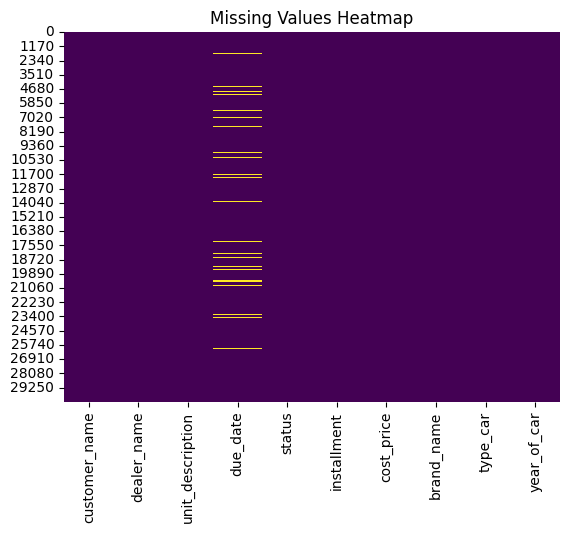

In [33]:
# Try to visualize the missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Usually we should decide what to do during the missingness check, either we just keep it, drop it, or impute it. </br>
For the current dataset, I'd chose to let it be since it contains meaningful information.

In [34]:
# Check its duplicates as well, check it out once again
df.duplicated().sum()

# If the dupes exist, usually just drop it using
# df.drop_duplicates(inplace=True)

0

Now let's move to EDA Visualization, usually on univariate.

In [35]:
# Now let's create a separate list of each different dtype from columns

print(df.shape[1])
print(f"Below is the numeric column")
num_cols = df.select_dtypes(include='number').columns.tolist()
print(num_cols)
print(f"A total of {len(num_cols)} columns.")
print('--------'*10)
print(f"Below is the string column")
str_cols = df.select_dtypes(include='string').columns.tolist()
print(str_cols)
print(f"A total of {len(str_cols)} columns.")
print('--------'*10)
print(f"Below is the categorical column")
cat_cols = df.select_dtypes(include='category').columns.tolist()
print(cat_cols)
print(f"A total of {len(cat_cols)} columns.")
print('--------'*10)
print(f"Below is the date column")
date_cols = df.select_dtypes(include='datetime').columns.tolist()
print(date_cols)
print(f"A total of {len(date_cols)} columns.")
print('--------'*10)

10
Below is the numeric column
['installment', 'cost_price']
A total of 2 columns.
--------------------------------------------------------------------------------
Below is the string column
['customer_name', 'dealer_name', 'unit_description', 'type_car', 'year_of_car']
A total of 5 columns.
--------------------------------------------------------------------------------
Below is the categorical column
['status', 'brand_name']
A total of 2 columns.
--------------------------------------------------------------------------------
Below is the date column
['due_date']
A total of 1 columns.
--------------------------------------------------------------------------------


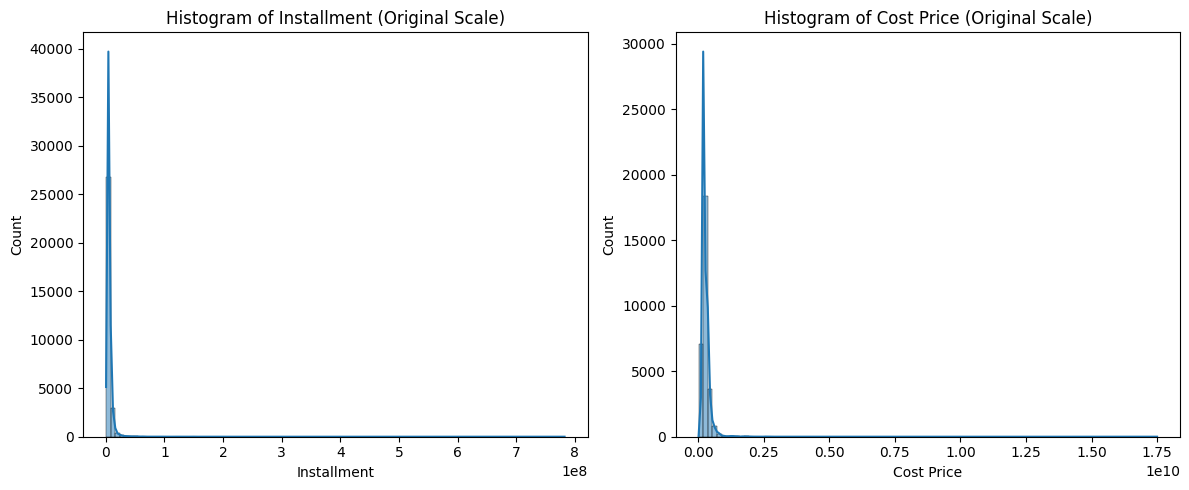

In [36]:
# Since the numerical data widely spreads, consider applying transformation like 'log'

# Below is the original shape, both are highly skewed
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['installment'], bins=100, kde=True)
plt.title('Histogram of Installment (Original Scale)')
plt.xlabel('Installment')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['cost_price'], bins=100, kde=True)
plt.title('Histogram of Cost Price (Original Scale)')
plt.xlabel('Cost Price')
plt.ylabel('Count')

plt.tight_layout()
plt.show()




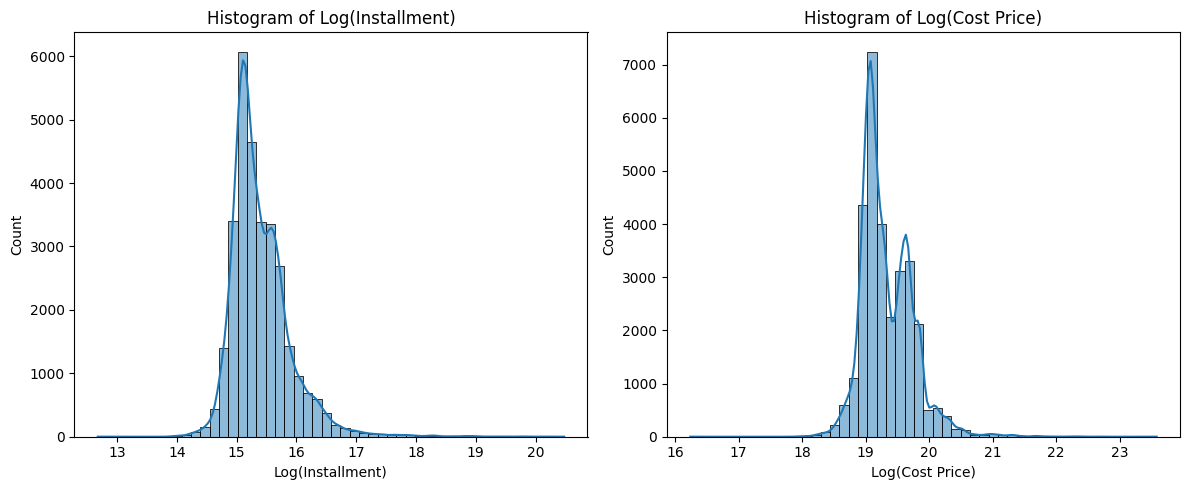

In [37]:
# After log transformation
df['log_installment'] = np.log(df['installment'])
df['log_cost_price'] = np.log(df['cost_price'])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['log_installment'], bins=50, kde=True)
plt.title('Histogram of Log(Installment)')
plt.xlabel('Log(Installment)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['log_cost_price'], bins=50, kde=True)
plt.title('Histogram of Log(Cost Price)')
plt.xlabel('Log(Cost Price)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [38]:
# Check the summary stats
print(df[['log_installment', 'log_cost_price']].describe())

       log_installment  log_cost_price
count     30406.000000    30406.000000
mean         15.397798       19.332633
std           0.502459        0.411573
min          12.676076       16.237897
25%          15.073119       19.051953
50%          15.286835       19.232499
75%          15.633750       19.607304
max          20.478237       23.585467


Now let's visualize categorical col

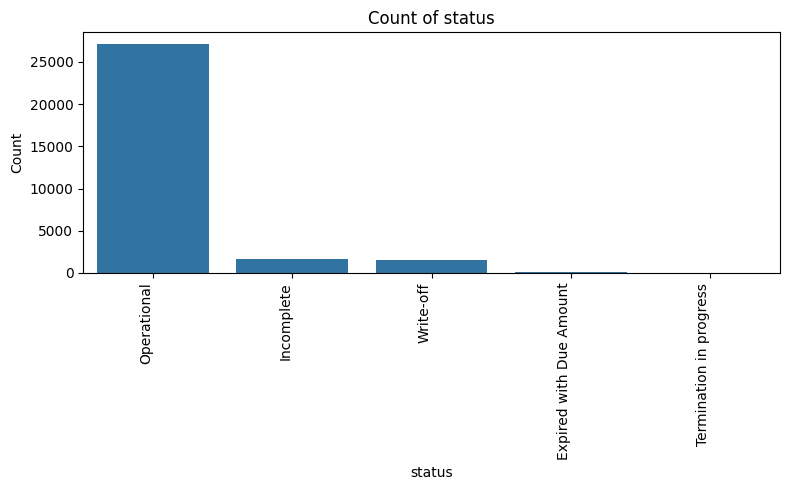

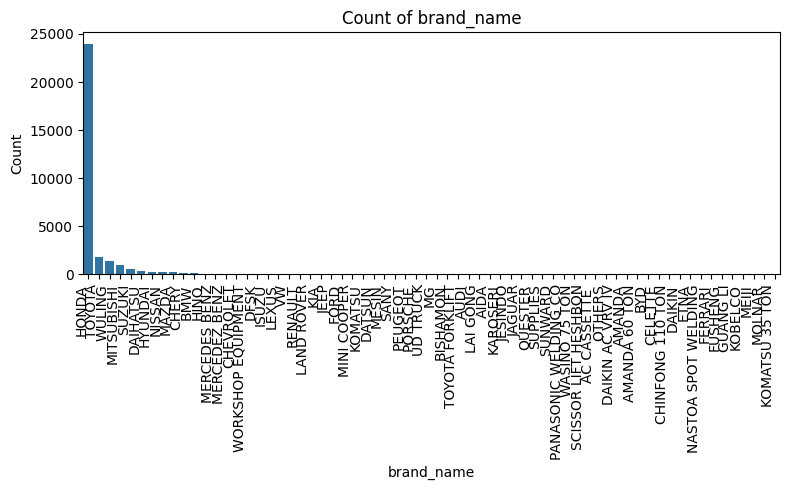

In [39]:
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90, ha='right') 
    plt.tight_layout()
    plt.show()

Above EDA's is usually enough when it comes to brief analysis, a lot of another exploratory phase like checking its correlation, outliers, etc. But those are usually on different use-case, imho above is already enough to understand the dataset.

Now let's create the visualization based on : </br>

1. Top 10 Most Sold Car Brands
2. Top Most Sold Car Models/Types using treemap
3. Distribution of Status Type
4. Top 10 Most Frequent Customers
5. Top 10 Most Frequent Dealers


   Brand Name  Count
0       HONDA  23973
1      TOYOTA   1856
2      WULING   1373
3  MITSUBISHI    935
4      SUZUKI    527
5    DAIHATSU    399
6     HYUNDAI    240
7      NISSAN    215
8       MAZDA    212
9       CHERY    116


C:\Users\Satria Audria Sakti\AppData\Local\Temp\ipykernel_18748\2778310846.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand Name', y='Count', data=top_10_brand, palette='viridis', order=brand_order)


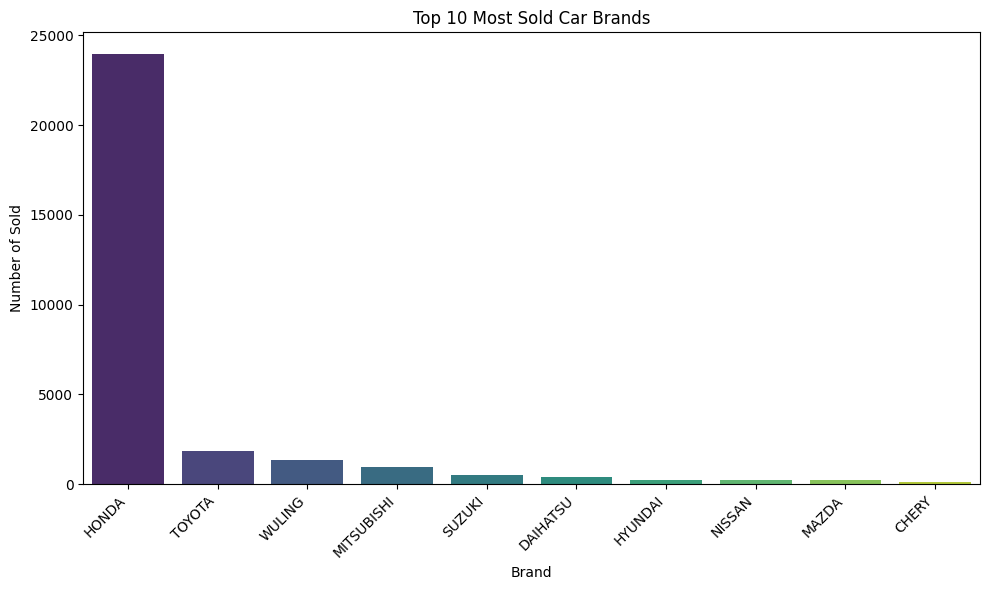

In [40]:
# 1 . Top 10 Most Sold Car Brands

top_10_brand = df['brand_name'].value_counts()
top_10_brand = top_10_brand.head(10)
# Reset the index for clarity
top_10_brand = top_10_brand.reset_index()
top_10_brand.columns = ['Brand Name', 'Count']
# Sort by desc
top_10_brand = top_10_brand.sort_values(by='Count', ascending=False)
print(top_10_brand)

# Now let's visualize it
brand_order = top_10_brand['Brand Name'].tolist()
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand Name', y='Count', data=top_10_brand, palette='viridis', order=brand_order)
plt.title('Top 10 Most Sold Car Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Honda takes the top seat as the most sold car brand!

In [41]:
# 2. Top Most Sold Car Models/Types using treemap

# Use plotly.express library
import plotly.express as px

sales_counts = df.groupby(['brand_name', 'type_car']).size().reset_index(name='unit_sold')
sales_counts = sales_counts.sort_values(by='unit_sold', ascending=False)
print(sales_counts)

# Now let's create the treemap
# Check the top 15
top_unit_sold = sales_counts.head(15)
fig = px.treemap(top_unit_sold,
                 path=['brand_name', 'type_car'],  # Defines the hierarchy
                 values='unit_sold',          # Defines the size of the rectangles
                 title='Top Most Sold Car Models/Types',
                 labels={'unit_sold': 'Number of Unit Sold'}) 
# Display the treemap
fig.show()


C:\Users\Satria Audria Sakti\AppData\Local\Temp\ipykernel_18748\1919364779.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_counts = df.groupby(['brand_name', 'type_car']).size().reset_index(name='unit_sold')


       brand_name                    type_car  unit_sold
46715       HONDA          ALL NEW BRIO E CVT       3337
47044       HONDA            BRIO SATYA E CVT       2329
46716       HONDA           ALL NEW BRIO E MT       1994
47045       HONDA             BRIO SATYA E MT       1507
46717       HONDA         ALL NEW BRIO RS CVT        724
...           ...                         ...        ...
44484    GUANG LI        Vehicle Lift 2500 Kg          0
44483    GUANG LI   VW NEW BEETLE 2.0 AT 2010          0
44482    GUANG LI                 VW GOLF 1.4          0
44481    GUANG LI                      VRV IV          0
133781     WULING           ZS MCE LUX 4x2 AT          0

[133782 rows x 3 columns]


Once again, Honda seems to dominate the seat as the top sold unit even it's in a Treemap!

C:\Users\Satria Audria Sakti\AppData\Local\Temp\ipykernel_18748\3359793756.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




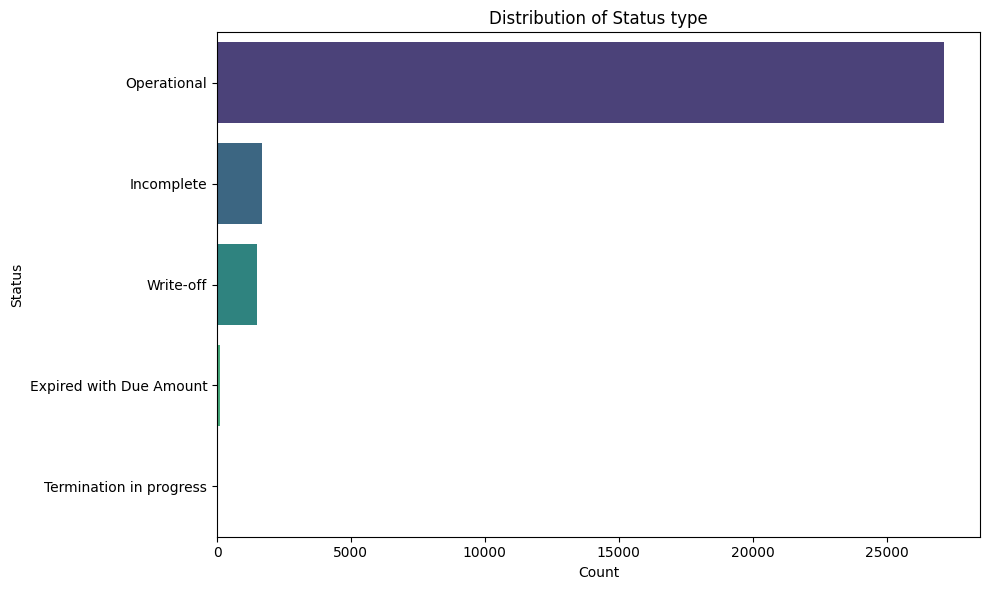

In [48]:
# 3. Distribution of status type

status_col = df['status'].value_counts()
status_col = status_col.reset_index()
status_col.columns = ['Status', 'Count']

# Now let's visualize it
status_col = status_col.sort_values(by='Count', ascending=False)
status_order = status_col['Status'].tolist()
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Status', data=status_col, palette='viridis', order=status_order)
plt.title('Distribution of Status type')
plt.xlabel('Count')
plt.ylabel('Status')
plt.tight_layout()
plt.show()


Most of the status type is still 'Operational'

                Customer Name  Count
0  PT. TRANS ARMADA INDONESIA     46
1             PT. IMORA MOTOR     27
2                     MULYADI     22
3                 SRI WAHYUNI     21
4                      HENDRA     21
5         PT. ARTA BUMI MOTOR     18
6       PT. UMARA NIKMAT BOGA     15
7        PT. DUA RAJA BALOHAN     15
8                   NURHAYATI     15
9                     HERLINA     14


C:\Users\Satria Audria Sakti\AppData\Local\Temp\ipykernel_18748\586987881.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




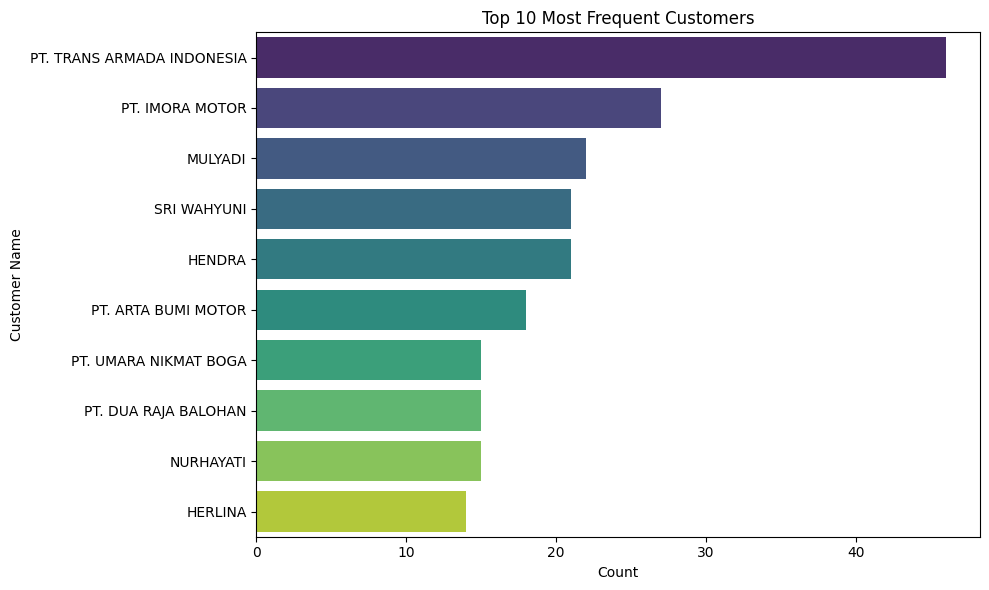

In [53]:
# 4. Top 10 Most Frequent Customers

top_10_cust = df['customer_name'].value_counts()
top_10_cust= top_10_cust.head(10)
# Reset the index for clarity
top_10_cust = top_10_cust.reset_index()
top_10_cust.columns = ['Customer Name', 'Count']
# Sort by desc
top_10_cust = top_10_cust.sort_values(by='Count', ascending=False)
print(top_10_cust)

# Now let's visualize it
cust_order = top_10_cust['Customer Name'].tolist()
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Customer Name', data=top_10_cust, palette='viridis', order=cust_order)
plt.title('Top 10 Most Frequent Customers')
plt.xlabel('Count')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

PT. TRANS ARMADA INDONESIA take the top seat for the most frequent customer!

                   Dealer Name  Count
0               HONDA CIKARANG   1288
1           HONDA WILTOP JAMBI   1094
2                 HONDA NAGOYA    655
3        HONDA SURABAYA CENTER    594
4      HONDA AMARTHA SAMARINDA    592
5         HONDA JAKARTA CENTER    568
6       HONDA ARISTA PEKANBARU    489
7  HONDA ANUGERAH KASIH PUTERA    472
8                HONDA CIBUBUR    470
9         HONDA MAKASSAR INDAH    424


C:\Users\Satria Audria Sakti\AppData\Local\Temp\ipykernel_18748\966904442.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




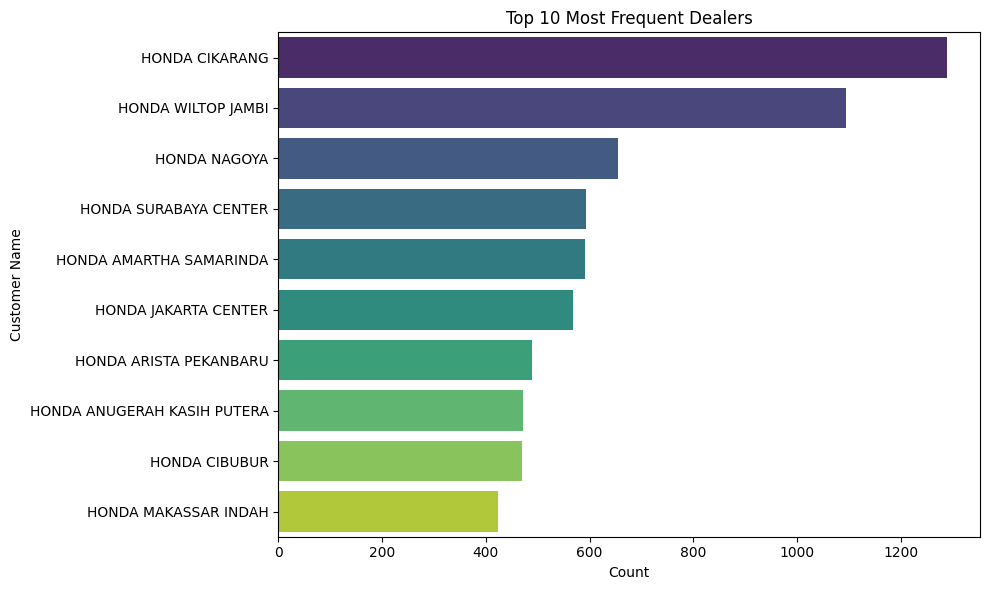

In [54]:
# 5. Top 10 Most Frequent Dealers

top_10_dealer = df['dealer_name'].value_counts()
top_10_dealer = top_10_dealer.head(10)
# Reset the index for clarity
top_10_dealer = top_10_dealer.reset_index()
top_10_dealer.columns = ['Dealer Name', 'Count']
# Sort by desc
top_10_dealer = top_10_dealer.sort_values(by='Count', ascending=False)
print(top_10_dealer)

# Now let's visualize it
dealer_order = top_10_dealer['Dealer Name'].tolist()
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Dealer Name', data=top_10_dealer, palette='viridis', order=dealer_order)
plt.title('Top 10 Most Frequent Dealers')
plt.xlabel('Count')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

HONDA CIKARANG takes the seat for the most frequent dealer!

### Now let's just proceed through the SQL Assessment, here I'll use docker container as MySQL Server and Dbeaver as its DBMS.